# DATA CLEANING

## In this file, we will clean several individual datasets, rename variables of interest, and merge the datasets into a singular dataframe based on the "Year" variable

Dataset #1: Labor Force Participation Rate for Women

In [2]:
import pandas as pd
import matplotlib as mlt
import numpy as np
import seaborn as sns


In [3]:

# load labor force data

df1 = pd.read_csv("/workspace/DS4002Project2/DATA/laborforce/laborforce.csv")
print( df1.columns )

# we need the columns to be separated by commas. Let's do that here:

input_file = '/workspace/DS4002Project2/DATA/laborforce/laborforce.csv'
output_file = '/workspace/DS4002Project2/DATA/laborforce/laborforce_2.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        cleaned_line = ','.join(line.split())
        outfile.write(cleaned_line + '\n')
print(f"Processed file saved as {output_file}.")

df = pd.read_csv( "/workspace/DS4002Project2/DATA/laborforce/laborforce_2.csv" )

# Split "Year" column of the df into year, month, and day variables
df[['Year', 'Month', 'Day']] = df['DATE'].str.split('-', expand=True)
print(df.head()) # printing head -- we see that this successfully created new columns. We will use the "Year" column for merging

# rename column to specify variable for female labor force participation rate:
df = df.rename(columns={'LNS11300002': 'Female_LFPR'})
print(df.head())

# create version of the dataframe which only includes the first row for each year recorded, because we don't want duplicates
df1_unique = df.drop_duplicates(subset='Year', keep='first')
print(df1_unique.head()) # looks like this worked

Index(['DATE\tLNS11300002'], dtype='object')
Processed file saved as /workspace/DS4002Project2/DATA/laborforce/laborforce_2.csv.
         DATE  LNS11300002  Year Month Day
0  1948-01-01         32.0  1948    01  01
1  1948-02-01         32.4  1948    02  01
2  1948-03-01         32.1  1948    03  01
3  1948-04-01         33.0  1948    04  01
4  1948-05-01         32.0  1948    05  01
         DATE  Female_LFPR  Year Month Day
0  1948-01-01         32.0  1948    01  01
1  1948-02-01         32.4  1948    02  01
2  1948-03-01         32.1  1948    03  01
3  1948-04-01         33.0  1948    04  01
4  1948-05-01         32.0  1948    05  01
          DATE  Female_LFPR  Year Month Day
0   1948-01-01         32.0  1948    01  01
12  1949-01-01         32.6  1949    01  01
24  1950-01-01         33.4  1950    01  01
36  1951-01-01         34.3  1951    01  01
48  1952-01-01         35.0  1952    01  01


Dataset #2: Wage gap / payment statistics for men vs. women in the US

In [4]:

# remove commas from pay equity data and save as new csv dataset

pay_commas = '/workspace/DS4002Project2/DATA/pay_equity/pay_equity.csv'
pay_new = '/workspace/DS4002Project2/DATA/pay_equity/pay_equity_2.csv'

with open(pay_commas, 'r') as file:
    file_data = file.read()
file_data = file_data.replace(',', '')
with open(pay_new, 'w') as file:
    file.write(file_data)

print(f"All commas removed and saved to {pay_new}.")

df2 = pd.read_csv("/workspace/DS4002Project2/DATA/pay_equity/pay_equity_2.csv")
print( df2.columns ) # this shows that there are many spaces in our csv file, which need to be replaced with commas. Let's perform more cleaning:

# replace all spaces in "pay_equity_new.csv" with commas, and save file as "pay_equity_new2.csv"

input_file = '/workspace/DS4002Project2/DATA/pay_equity/pay_equity_2.csv'
output_file = '/workspace/DS4002Project2/DATA/pay_equity/pay_equity_3.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        cleaned_line = ','.join(line.split())
        outfile.write(cleaned_line + '\n')
print(f"Processed file saved as {output_file}.")

df2 = pd.read_csv("/workspace/DS4002Project2/DATA/pay_equity/pay_equity_3.csv")

# rename "percent" column to "wage ratio". This column shows the percentage of a dollar that women receive for each dollar earned by a man
df2 = df2.rename(columns={'Percent': 'Wage_ratio'})

# getting rid of percentage signs and asterixes for wage ratios:
df2['Wage_ratio'] = df2['Wage_ratio'].str.replace('%', '', regex=False)
df2['Wage_ratio'] = df2['Wage_ratio'].str.replace('*', '', regex=False)
df2['Wage_ratio'] = df2['Wage_ratio'].astype('float64') # convert data type to float64

print(df2.head())


All commas removed and saved to /workspace/DS4002Project2/DATA/pay_equity/pay_equity_2.csv.
Index(['Year   Women's         Men's   Dollar        Percent'], dtype='object')
Processed file saved as /workspace/DS4002Project2/DATA/pay_equity/pay_equity_3.csv.
   Year Women's   Men's  Dollar  Wage_ratio
0  2019  $47299  $57456  $10157        82.0
1  2018  $45097  $55291  $10194        81.6
2  2017  $41977  $52146  $10169        80.5
3  2016  $41554  $51640  $10086        80.5
4  2015  $40742  $51212  $10470        79.6


Dataset 3: Educational attainment statistics for women in the US

In [5]:
# clean education_female csv file.

# the uncleaned file has some weird spaces on each row. Let's remove these, and place commas between each item:
input_file = '/workspace/DS4002Project2/DATA/education_female/education_female.csv'
output_file = '/workspace/DS4002Project2/DATA/education_female/education_female_2.csv'
def process_line(line):
    return ','.join(line.lstrip().split())

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        cleaned_line = process_line(line)
        outfile.write(cleaned_line + '\n')

df3 = pd.read_csv( "/workspace/DS4002Project2/DATA/education_female/education_female_2.csv" )

# looking at the dataset, there are some weird slashes occuring with some of the values. Let's remove those:
df3['Year'] = df3['Year'].str.replace(r'\\4\\', '', regex=True)
print(df3.head()) # printing out the head, the values look normal now
print(df3.columns)
print(f"Number of columns: {len(df3.columns)}")

   Year  Bachelor_percentage Std_error
0  1940                  3.8     (---)
1  1950                  5.2     (---)
2  1960                  5.8     (---)
3  1970                  8.2     (---)
4  1980                 13.6    (0.20)
Index(['Year', 'Bachelor_percentage', 'Std_error'], dtype='object')
Number of columns: 3


Merging everything into one dataframe:

In [10]:
# Merge the datasets on the "Year" variable

# select the columns that we want to include from each dataframe:
labor_df = df1_unique[ ["Year", "Female_LFPR"]]
education_df = df3[ ["Year", "Bachelor_percentage"] ]
pay_df = df2[ ["Year", "Wage_ratio"] ]

merged_df = pd.merge(labor_df, education_df, on='Year')
merged_df = pd.merge(merged_df, pay_df, on='Year')

merged_df_nulls = pd.merge(labor_df, education_df, on='Year', how="outer")
merged_df_nulls = pd.merge(merged_df, pay_df, on='Year', how="outer")

# print head of merged dataset:
print( merged_df.head() )

# save the merged dataframe to a csv file:
merged_df.to_csv("/workspace/DS4002Project2/DATA/merged.csv", index=False)
merged_df_nulls.to_csv("/workspace/DS4002Project2/DATA/merged_nulls.csv", index=False)

excel_file = "/workspace/DS4002Project2/DATA/merged_nulls.xlsx"
merged_df_nulls.to_excel(excel_file, index=False)  # index=False prevents adding the index as a column



   Year  Female_LFPR  Bachelor_percentage  Wage_ratio
0  1960         37.0                  5.8        60.7
1  1970         43.3                  8.2        59.4
2  1980         51.6                 13.6        60.2
3  1990         57.7                 18.4        71.6
4  1995         58.8                 20.2        71.4


# EDA

## Next, we will create some plots to describe our time series data:

In [90]:

print(merged_df["Wage_ratio"].dtypes)

float64


Wage ratio EDA:

In [93]:
# Let's retrieve summary stats for wage ratio over the years included in the dataset:
print( merged_df[ "Wage_ratio" ].describe()) 

# The median wage ratio over the years included is 76.75%. This means that on average, over the course of recorded years in the dataset, women earned 76 cents for every dollar earned by men.

count    28.000000
mean     74.864286
std       5.917283
min      59.400000
25%      73.275000
50%      76.750000
75%      77.925000
max      82.000000
Name: Wage_ratio, dtype: float64


<Axes: ylabel='Density'>

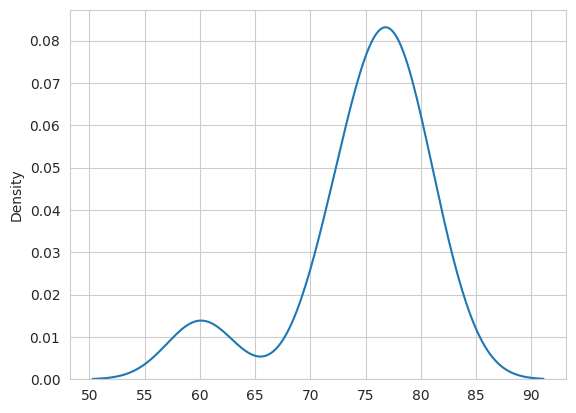

In [108]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(merged_df["Wage_ratio"]))
